# Exploratory Data Analysis on Medical Condition Prediction Dataset

**Author** Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

*Student of Masters in Data Science @ FAST NUCES (LAHORE)*


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.impute import KNNImputer
import warnings

# Important Settings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/medical-condition-prediction-dataset/medical_conditions_dataset.csv")

# Viewing Dataset

In [4]:
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB


In [6]:
df.isnull().sum()

id                   0
full_name            0
age               4555
gender               0
smoking_status       0
bmi               5348
blood_pressure    6234
glucose_levels    5244
condition            0
dtype: int64

There are many null values in the dataset, so we will handle them in Data Preprocessing part.

# Data Preprocessing

Before handeling the null values, first we will check the data is normally distributed or not.

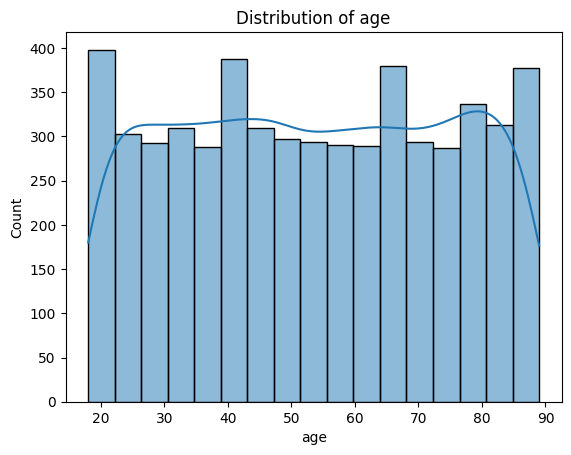

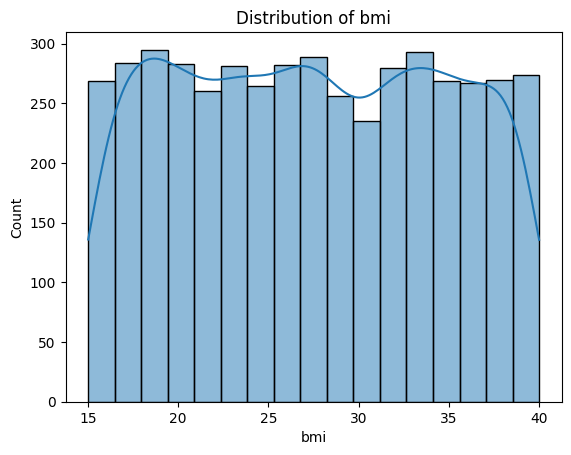

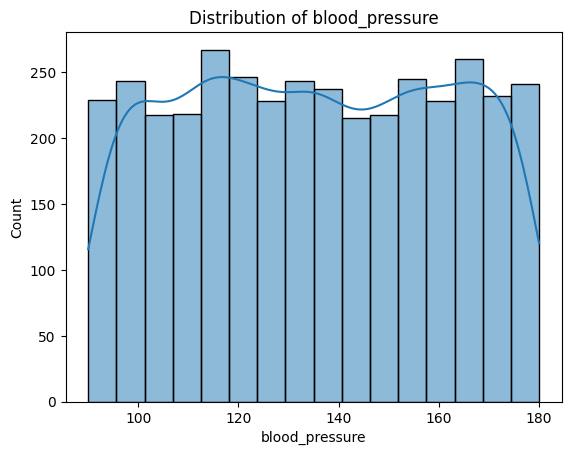

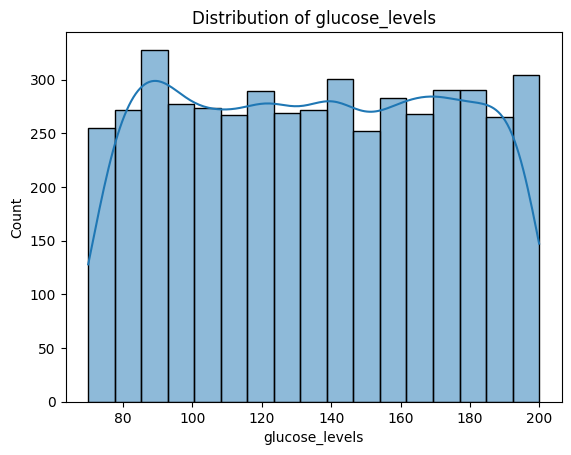

In [7]:
columns = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
for col in columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Q-Q Plot for each column

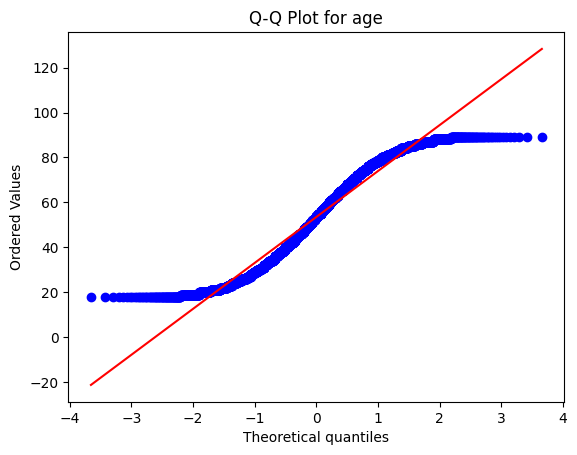

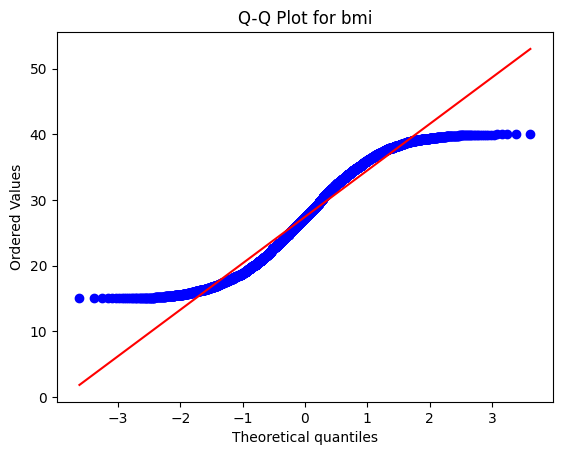

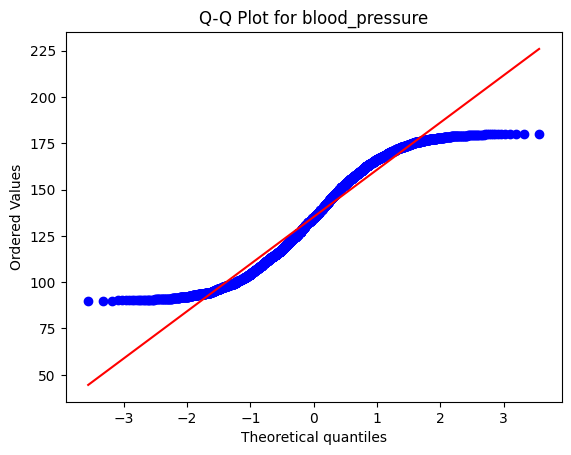

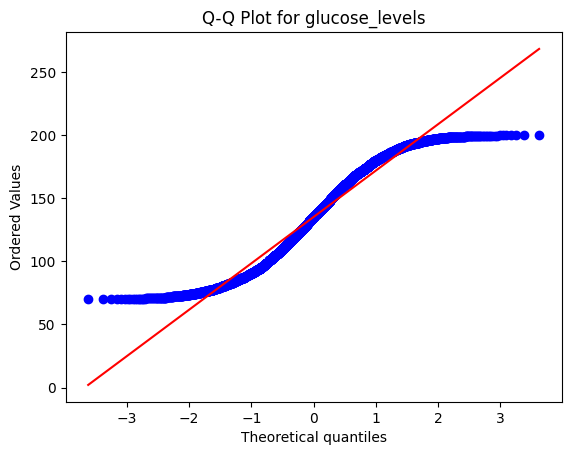

In [8]:
for col in columns:
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

Shapiro-Wilk Test for each column

In [9]:
for col in columns:
    stat, p = shapiro(df[col].dropna())
    print(f'Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p}')

Shapiro-Wilk Test for age: Statistic=0.9525616771099329, p-value=8.48187550984927e-39
Shapiro-Wilk Test for bmi: Statistic=0.9535429911497684, p-value=4.222847647963137e-36
Shapiro-Wilk Test for blood_pressure: Statistic=0.953592885495683, p-value=5.2007492546186624e-33
Shapiro-Wilk Test for glucose_levels: Statistic=0.9528105070237273, p-value=1.175165935644084e-36


Data is not normally distributed, so we will use KNN Imputer

In [10]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df[['age', 'bmi', 'blood_pressure', 'glucose_levels']])

df[['age', 'bmi', 'blood_pressure', 'glucose_levels']] = df_imputed

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             10000 non-null  float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             10000 non-null  float64
 6   blood_pressure  10000 non-null  float64
 7   glucose_levels  10000 non-null  float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB


## Dropping irrelevant columns

In [12]:
df = df.drop(['id', 'full_name'], axis=1)

In [13]:
df.head()

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,53.541598,male,Non-Smoker,27.423420,135.209429,135.219608,Pneumonia
1,30.000000,male,Non-Smoker,28.924770,105.315064,148.837937,Diabetic
2,18.000000,male,Non-Smoker,35.612486,138.153310,153.485514,Pneumonia
3,54.000000,male,Non-Smoker,25.621843,99.119829,110.798413,Pneumonia
4,76.000000,male,Non-Smoker,26.551568,134.310935,155.190920,Diabetic


# Exploratory Data Analysis

In [14]:
df["gender"].value_counts()

gender
male      8506
female    1494
Name: count, dtype: int64

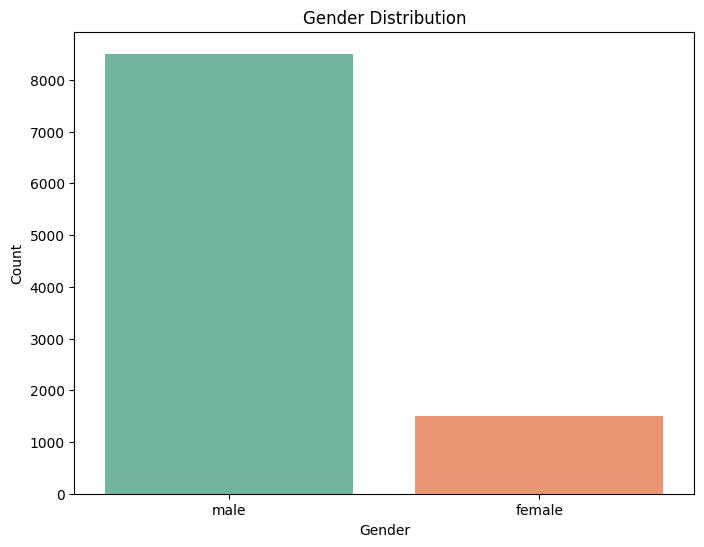

In [15]:
gender_counts = df['gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [16]:
df["smoking_status"].value_counts()

smoking_status
Non-Smoker    9014
Smoker         986
Name: count, dtype: int64

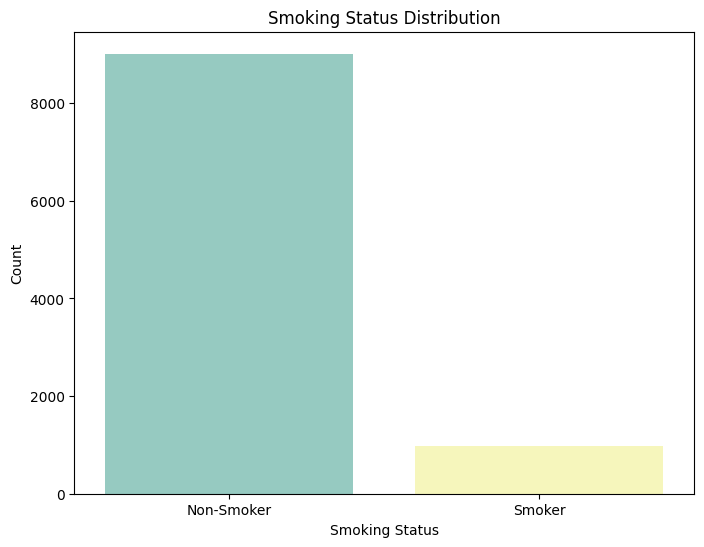

In [17]:
smoking_status_counts = df['smoking_status'].value_counts()

# Plot the smoking status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_status_counts.index, y=smoking_status_counts.values, palette="Set3")
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [18]:
condition_counts = df['condition'].value_counts()
print(condition_counts)

condition
Diabetic     6013
Pneumonia    2527
Cancer       1460
Name: count, dtype: int64


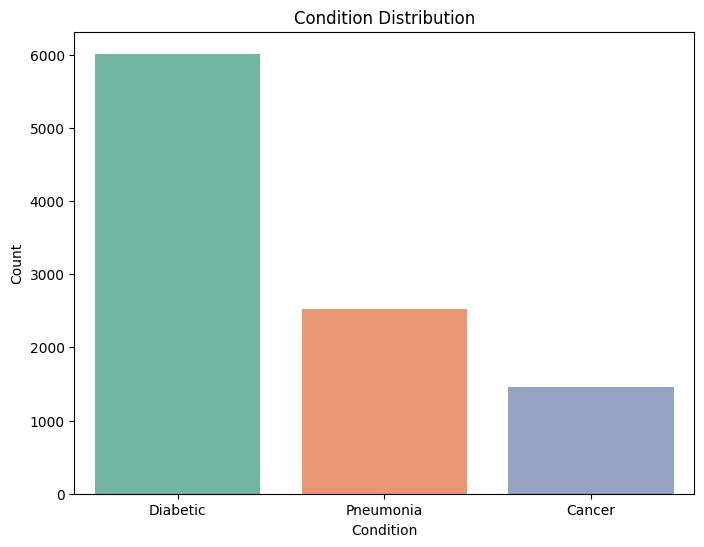

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="Set2")
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [20]:
condition_by_gender = df.groupby('gender')['condition'].value_counts()
print(condition_by_gender)

gender  condition
female  Diabetic      893
        Pneumonia     391
        Cancer        210
male    Diabetic     5120
        Pneumonia    2136
        Cancer       1250
Name: count, dtype: int64


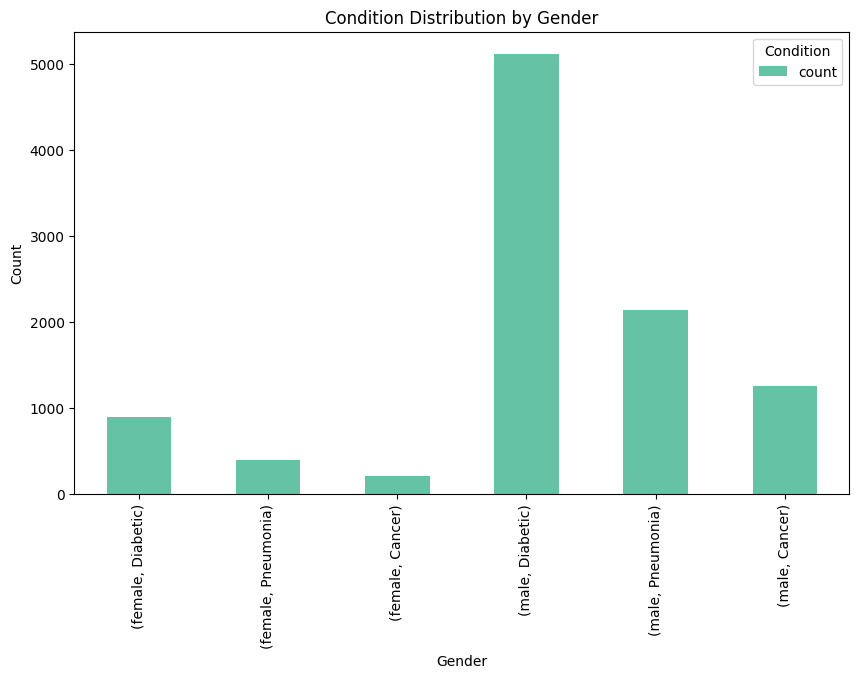

In [21]:
condition_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Condition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.show()

In [22]:
condition_by_gender_having_smoking_status = df.groupby(['gender','smoking_status'])['condition'].value_counts()
print(condition_by_gender_having_smoking_status)

gender  smoking_status  condition
female  Non-Smoker      Diabetic      814
                        Pneumonia     357
                        Cancer        195
        Smoker          Diabetic       79
                        Pneumonia      34
                        Cancer         15
male    Non-Smoker      Diabetic     4596
                        Pneumonia    1924
                        Cancer       1128
        Smoker          Diabetic      524
                        Pneumonia     212
                        Cancer        122
Name: count, dtype: int64


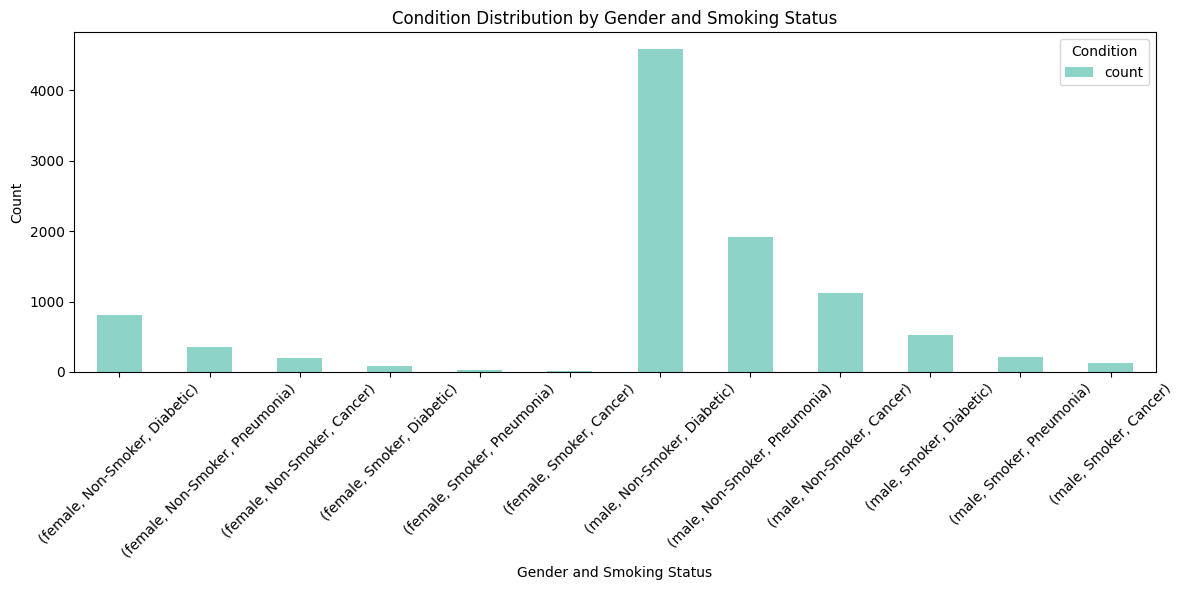

In [23]:
condition_by_gender_having_smoking_status.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('Condition Distribution by Gender and Smoking Status')
plt.xlabel('Gender and Smoking Status')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Age Distribution

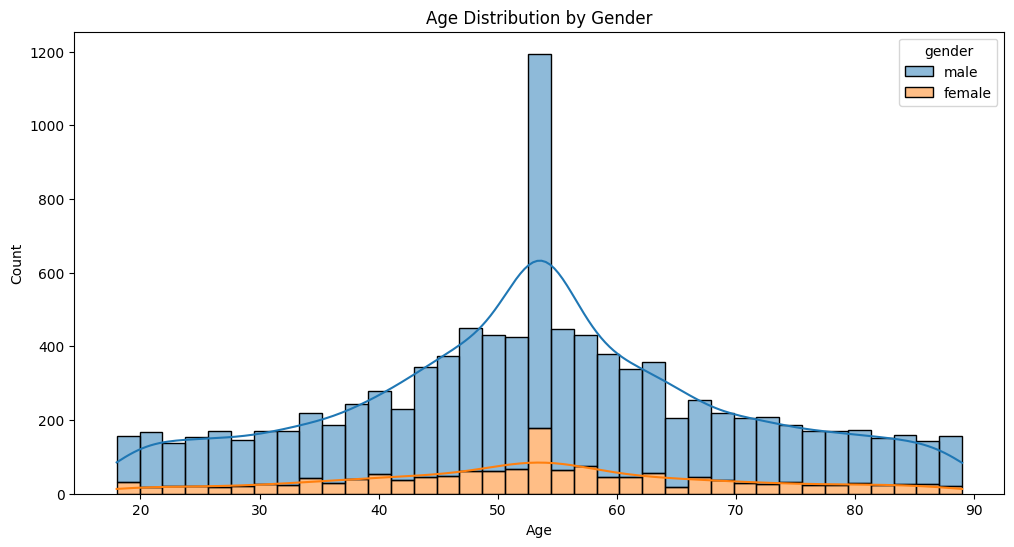

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='gender', multiple='stack', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Distribution of BMI acording to Gender

In [25]:
bmi_stats = df.groupby('gender')['bmi'].agg(['min', 'max', 'mean'])
print(bmi_stats)

              min        max       mean
gender                                 
female  15.069078  39.950025  27.605451
male    15.012119  39.998687  27.575882


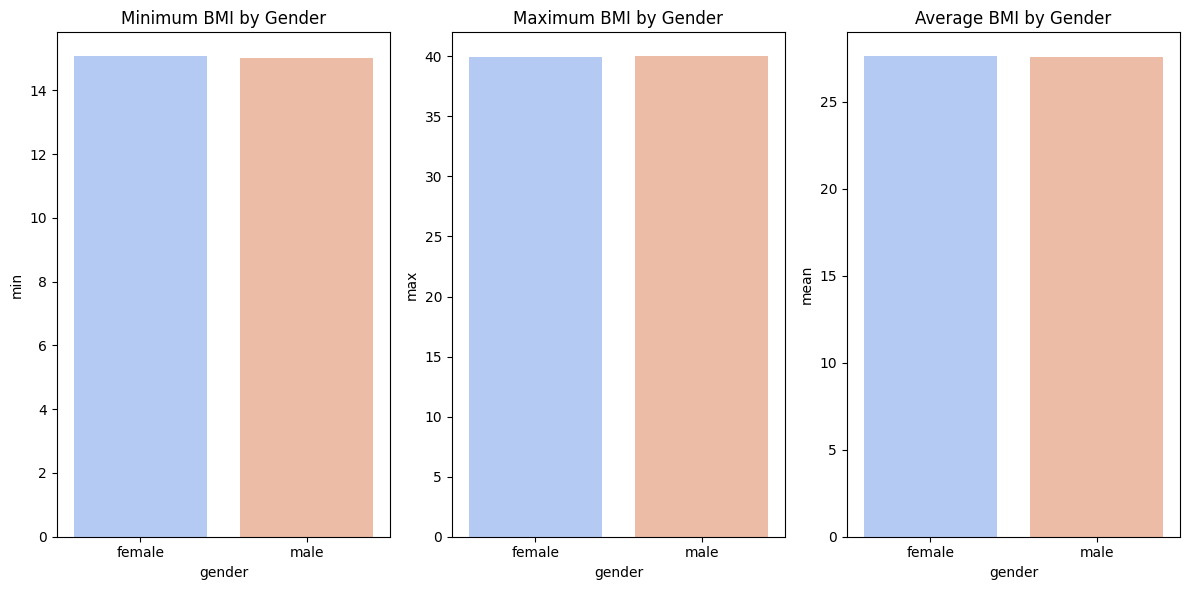

In [26]:
bmi_stats_df = bmi_stats.reset_index()

# Plotting BMI statistics
plt.figure(figsize=(12, 6))

# Plot Min BMI
plt.subplot(1, 3, 1)
sns.barplot(data=bmi_stats_df, x='gender', y='min', palette='coolwarm')
plt.title('Minimum BMI by Gender')

# Plot Max BMI
plt.subplot(1, 3, 2)
sns.barplot(data=bmi_stats_df, x='gender', y='max', palette='coolwarm')
plt.title('Maximum BMI by Gender')

# Plot Mean BMI
plt.subplot(1, 3, 3)
sns.barplot(data=bmi_stats_df, x='gender', y='mean', palette='coolwarm')
plt.title('Average BMI by Gender')

plt.tight_layout()
plt.show()

### Distribution of BMI acording to Smoker Status

In [27]:
bmi_stats_smoker = df.groupby('smoking_status')['bmi'].agg(['min', 'max', 'mean'])
print(bmi_stats_smoker)

                      min        max       mean
smoking_status                                 
Non-Smoker      15.012119  39.998687  27.580570
Smoker          15.068793  39.937487  27.577826


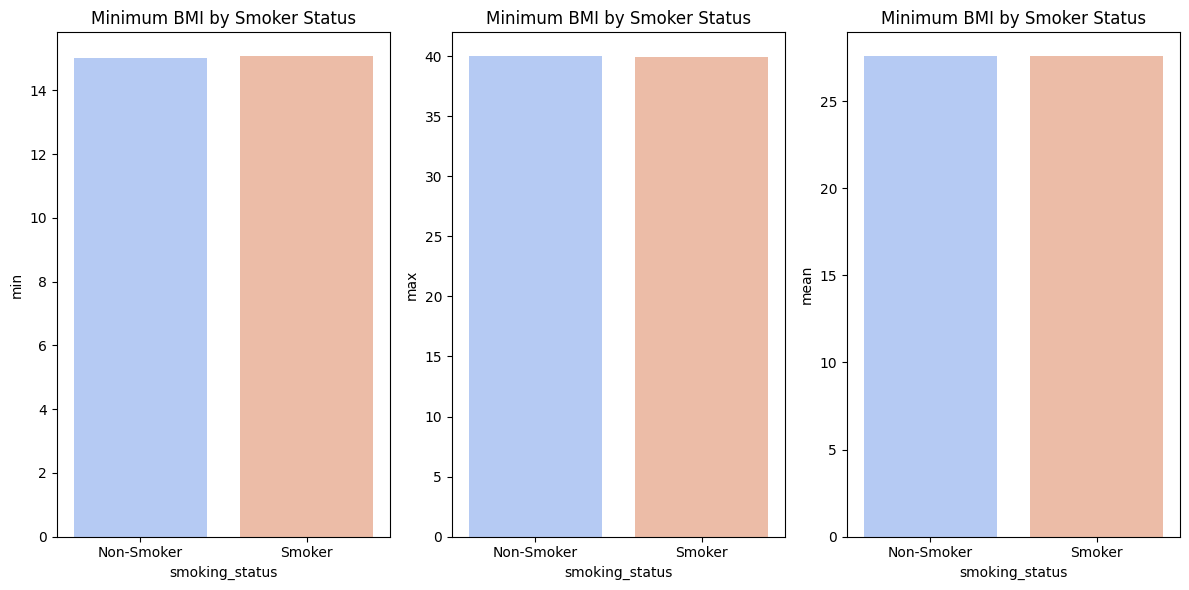

In [28]:
bmi_stats_smoke_df = bmi_stats_smoker.reset_index()

# Plotting BMI statistics
plt.figure(figsize=(12, 6))

# Plot Min BMI
plt.subplot(1, 3, 1)
sns.barplot(data=bmi_stats_smoke_df, x='smoking_status', y='min', palette='coolwarm')
plt.title('Minimum BMI by Smoker Status')

# Plot Max BMI
plt.subplot(1, 3, 2)
sns.barplot(data=bmi_stats_smoke_df, x='smoking_status', y='max', palette='coolwarm')
plt.title('Minimum BMI by Smoker Status')

# Plot Mean BMI
plt.subplot(1, 3, 3)
sns.barplot(data=bmi_stats_smoke_df, x='smoking_status', y='mean', palette='coolwarm')
plt.title('Minimum BMI by Smoker Status')

plt.tight_layout()
plt.show()

### Distribution of Blood Pressure acording to Gender

In [29]:
bp_stats = df.groupby('gender')['blood_pressure'].agg(['min', 'max', 'mean'])
print(bp_stats)

              min         max        mean
gender                                   
female  90.599895  179.943418  135.626628
male    90.009620  179.999359  135.318293


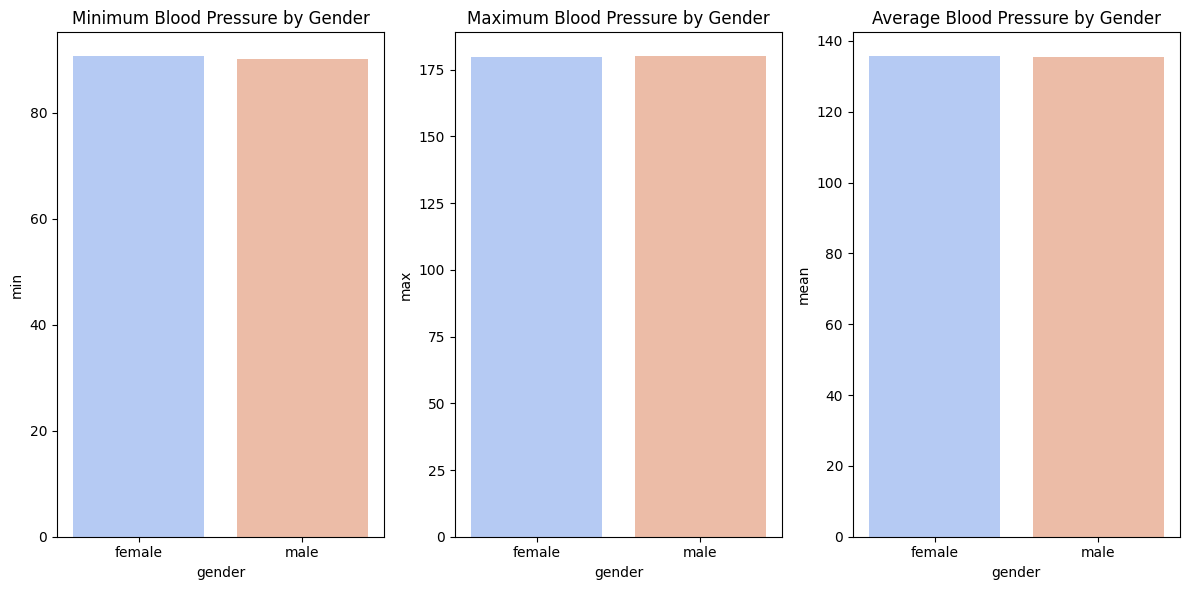

In [30]:
bp_stats_df = bp_stats.reset_index()

# Plotting Blood Pressure statistics
plt.figure(figsize=(12, 6))

# Plot Min Blood Pressure
plt.subplot(1, 3, 1)
sns.barplot(data=bp_stats_df, x='gender', y='min', palette='coolwarm')
plt.title('Minimum Blood Pressure by Gender')

# Plot Max Blood Pressure
plt.subplot(1, 3, 2)
sns.barplot(data=bp_stats_df, x='gender', y='max', palette='coolwarm')
plt.title('Maximum Blood Pressure by Gender')

# Plot Mean Blood Pressure
plt.subplot(1, 3, 3)
sns.barplot(data=bp_stats_df, x='gender', y='mean', palette='coolwarm')
plt.title('Average Blood Pressure by Gender')

plt.tight_layout()
plt.show()

### Distribution of BMI acording to Smoker Status

In [31]:
bp_stats_smoker = df.groupby('smoking_status')['blood_pressure'].agg(['min', 'max', 'mean'])
print(bp_stats)

              min         max        mean
gender                                   
female  90.599895  179.943418  135.626628
male    90.009620  179.999359  135.318293


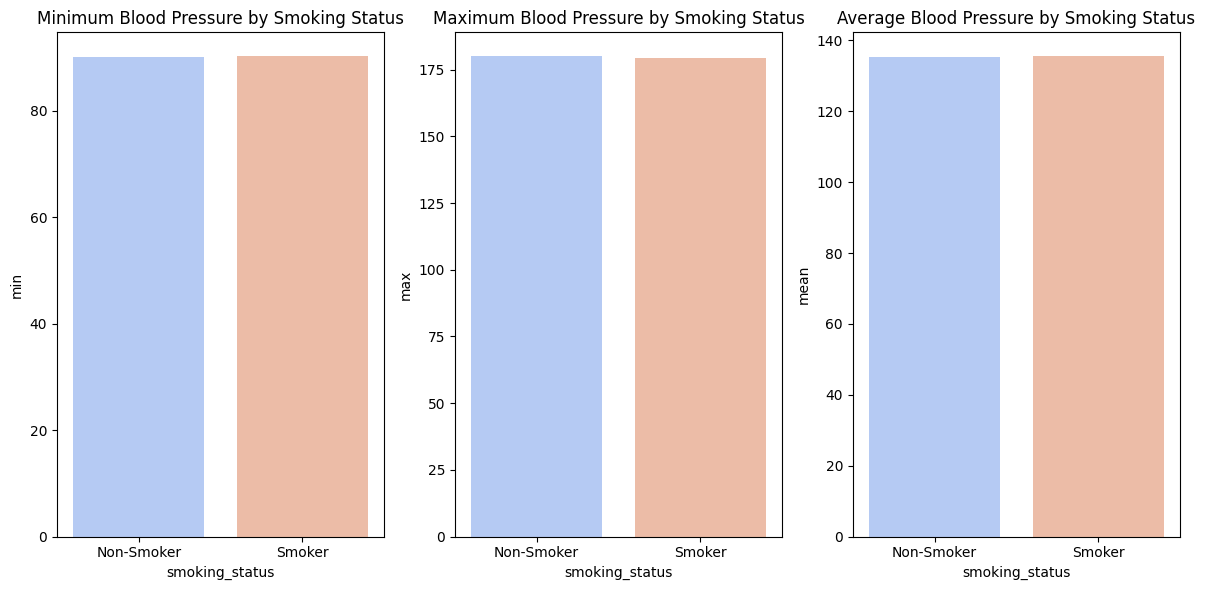

In [32]:
bp_stats_smoker_df = bp_stats_smoker.reset_index()

# Plotting Blood Pressure statistics
plt.figure(figsize=(12, 6))

# Plot Min Blood Pressure
plt.subplot(1, 3, 1)
sns.barplot(data=bp_stats_smoker_df, x='smoking_status', y='min', palette='coolwarm')
plt.title('Minimum Blood Pressure by Smoking Status')

# Plot Max Blood Pressure
plt.subplot(1, 3, 2)
sns.barplot(data=bp_stats_smoker_df, x='smoking_status', y='max', palette='coolwarm')
plt.title('Maximum Blood Pressure by Smoking Status')

# Plot Mean Blood Pressure
plt.subplot(1, 3, 3)
sns.barplot(data=bp_stats_smoker_df, x='smoking_status', y='mean', palette='coolwarm')
plt.title('Average Blood Pressure by Smoking Status')

plt.tight_layout()
plt.show()

### Distribution of Glucose Level acording to Gender

In [33]:
glucose_levels_stats = df.groupby('gender')['glucose_levels'].agg(['min', 'max', 'mean'])
print(glucose_levels_stats)

              min         max        mean
gender                                   
female  70.083133  199.553202  134.911186
male    70.015961  199.890429  135.757278


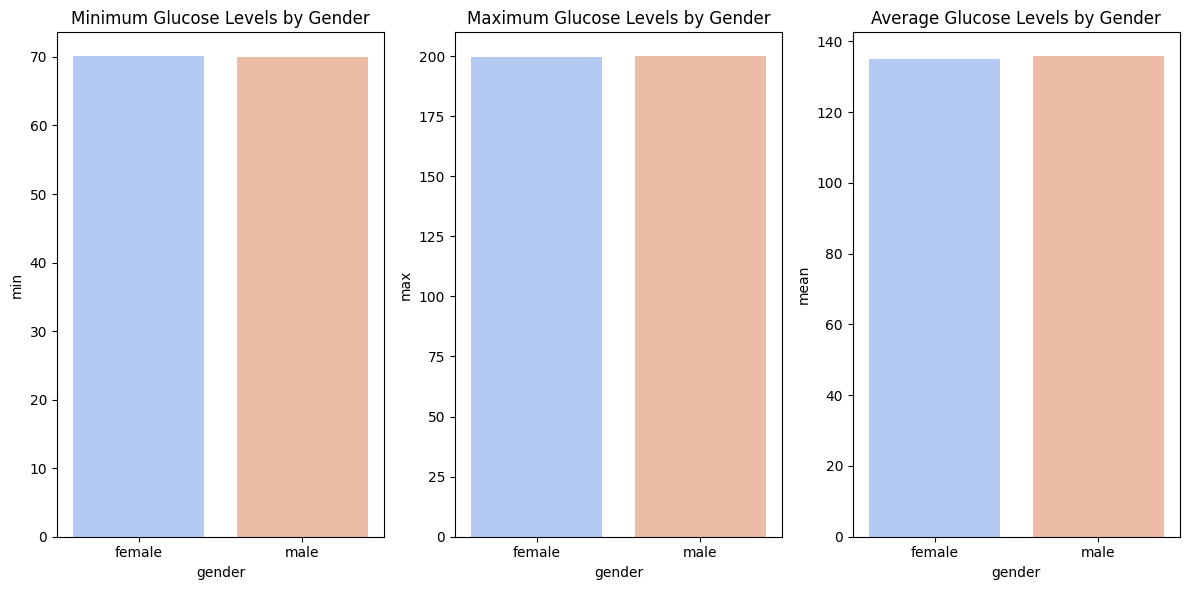

In [34]:
glucose_levels_stats_df = glucose_levels_stats.reset_index()

# Plotting Glucose Levels statistics
plt.figure(figsize=(12, 6))

# Plot Min Glucose Levels
plt.subplot(1, 3, 1)
sns.barplot(data=glucose_levels_stats_df, x='gender', y='min', palette='coolwarm')
plt.title('Minimum Glucose Levels by Gender')

# Plot Max Glucose Levels
plt.subplot(1, 3, 2)
sns.barplot(data=glucose_levels_stats_df, x='gender', y='max', palette='coolwarm')
plt.title('Maximum Glucose Levels by Gender')

# Plot Mean Glucose Levels
plt.subplot(1, 3, 3)
sns.barplot(data=glucose_levels_stats_df, x='gender', y='mean', palette='coolwarm')
plt.title('Average Glucose Levels by Gender')

plt.tight_layout()
plt.show()

### Distribution of Glucose Level acording to Smoking Status

In [35]:
glucose_levels_stats_smokers = df.groupby('smoking_status')['glucose_levels'].agg(['min', 'max', 'mean'])
print(glucose_levels_stats_smokers)

                      min         max        mean
smoking_status                                   
Non-Smoker      70.015961  199.861741  135.562109
Smoker          70.193884  199.890429  136.259495


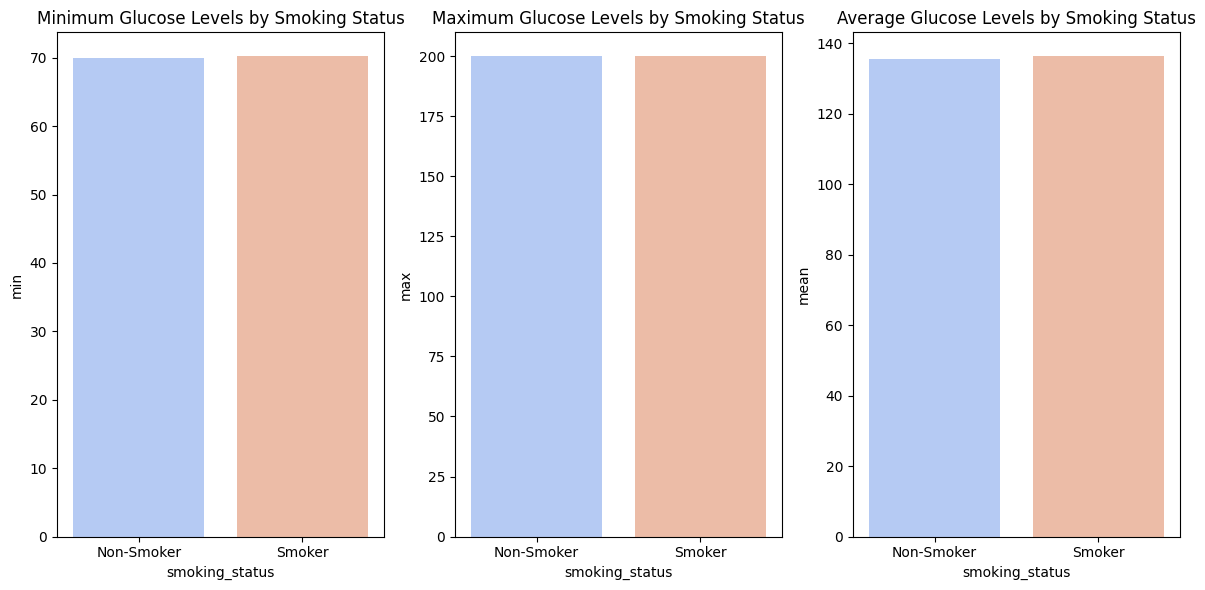

In [36]:
glucose_levels_smokers_stats_df = glucose_levels_stats_smokers.reset_index()

# Plotting Glucose Levels statistics
plt.figure(figsize=(12, 6))

# Plot Min Glucose Levels
plt.subplot(1, 3, 1)
sns.barplot(data=glucose_levels_smokers_stats_df, x='smoking_status', y='min', palette='coolwarm')
plt.title('Minimum Glucose Levels by Smoking Status')

# Plot Max Glucose Levels
plt.subplot(1, 3, 2)
sns.barplot(data=glucose_levels_smokers_stats_df, x='smoking_status', y='max', palette='coolwarm')
plt.title('Maximum Glucose Levels by Smoking Status')

# Plot Mean Glucose Levels
plt.subplot(1, 3, 3)
sns.barplot(data=glucose_levels_smokers_stats_df, x='smoking_status', y='mean', palette='coolwarm')
plt.title('Average Glucose Levels by Smoking Status')

plt.tight_layout()
plt.show()

### Making Age Bins

In [37]:
bins =   [0,       18,      30,      40,      50,     60,     100]  
labels = ['0-17', '18-29', '30-39', '40-49', '50-59','60+' ]  

df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [38]:
df.head()

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,age_bin
0,53.541598,male,Non-Smoker,27.423420,135.209429,135.219608,Pneumonia,50-59
1,30.000000,male,Non-Smoker,28.924770,105.315064,148.837937,Diabetic,30-39
2,18.000000,male,Non-Smoker,35.612486,138.153310,153.485514,Pneumonia,18-29
3,54.000000,male,Non-Smoker,25.621843,99.119829,110.798413,Pneumonia,50-59
4,76.000000,male,Non-Smoker,26.551568,134.310935,155.190920,Diabetic,60+


## Distribution of Data acording to Age Groups

### Gender Distribution

In [39]:
gender_distribution_by_age_bin = df.groupby(['age_bin', 'gender']).size().unstack(fill_value=0)
print(gender_distribution_by_age_bin)

gender   female  male
age_bin              
0-17          0     0
18-29       132   797
30-39       172   870
40-49       272  1607
50-59       439  2492
60+         479  2740


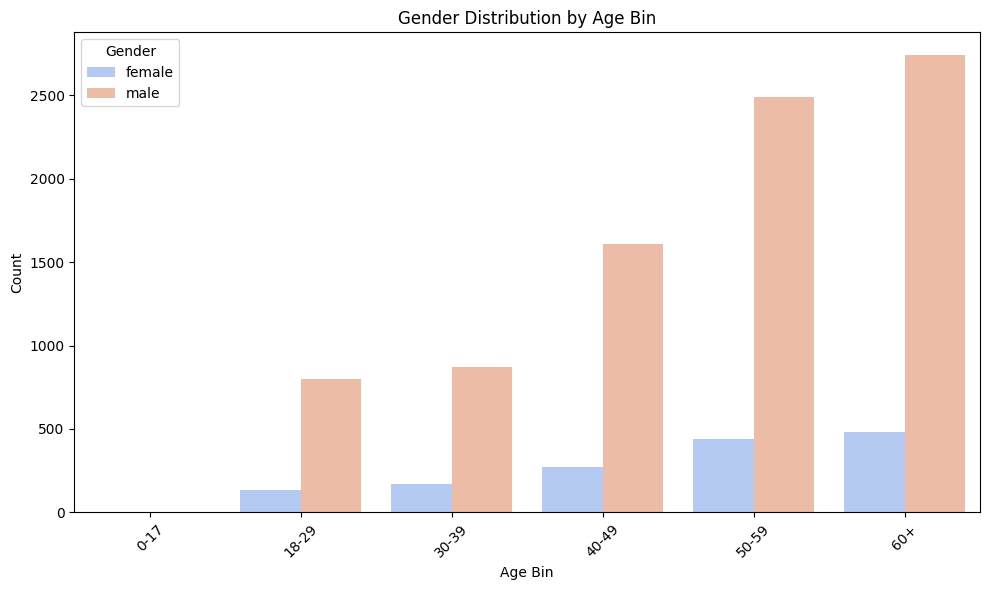

In [40]:
gender_distribution_df = gender_distribution_by_age_bin.reset_index()
melted_df = gender_distribution_df.melt(id_vars='age_bin', var_name='gender', value_name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='age_bin', y='count', hue='gender', palette='coolwarm')
plt.title('Gender Distribution by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### BMI with Gender Distribution 

In [41]:
bmi_stats_by_age_bin = df.groupby(['age_bin','gender'])['bmi'].agg(['min', 'max', 'mean'])
print(bmi_stats_by_age_bin)

                      min        max       mean
age_bin gender                                 
0-17    female        NaN        NaN        NaN
        male          NaN        NaN        NaN
18-29   female  15.246814  38.923450  27.814892
        male    15.077475  39.939327  27.401176
30-39   female  15.074618  39.576256  27.882475
        male    15.012119  39.920656  27.331000
40-49   female  15.163288  39.908752  26.572146
        male    15.019917  39.826367  26.956441
50-59   female  15.101980  39.950025  27.464300
        male    15.037574  39.998687  27.520424
60+     female  15.069078  39.732216  28.164386
        male    15.033058  39.969824  28.118192


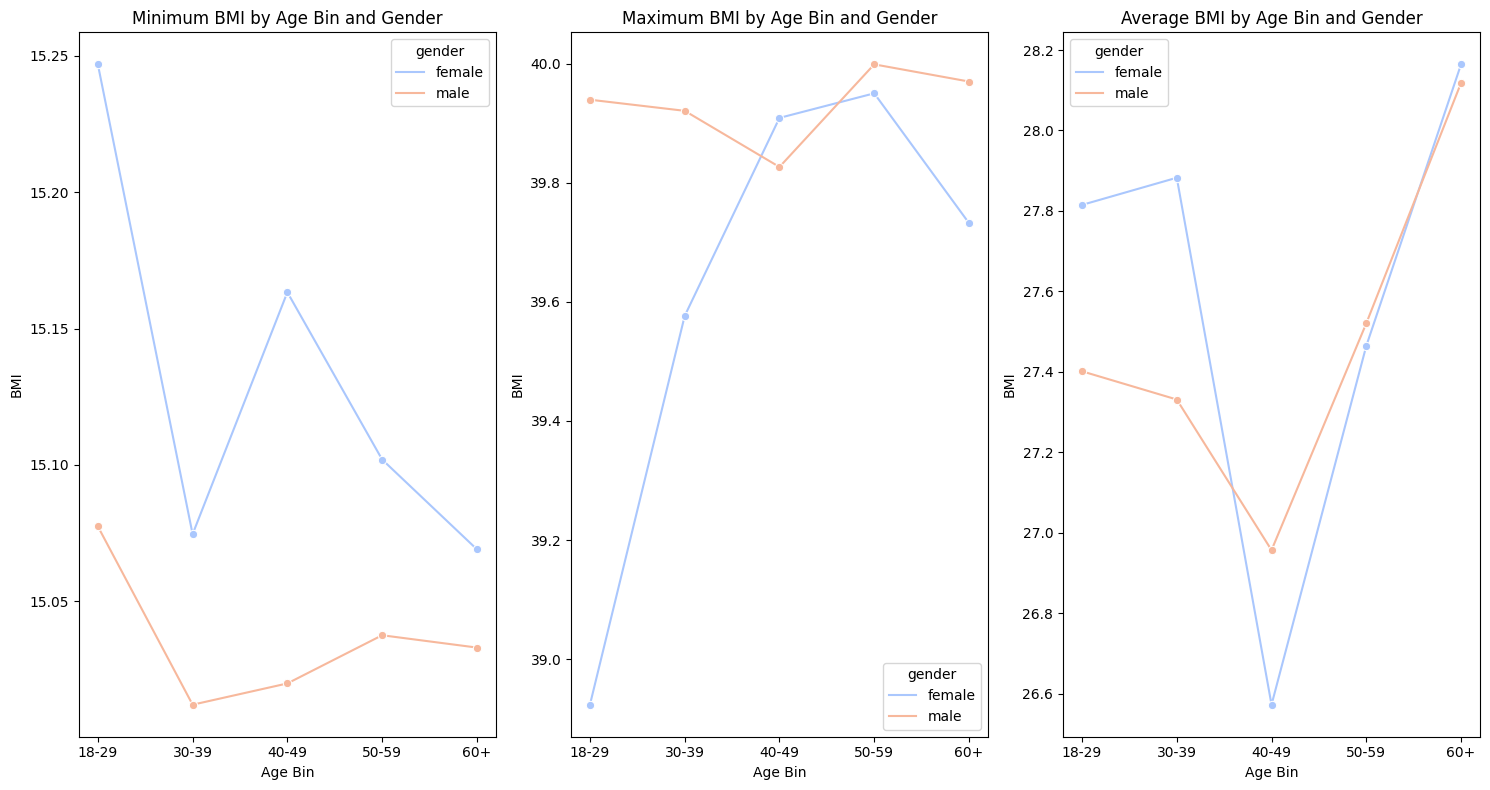

In [42]:
bmi_stats_by_age_bin_df = bmi_stats_by_age_bin.reset_index()

plt.figure(figsize=(15, 8))

# Plot Min BMI
plt.subplot(1, 3, 1)
sns.lineplot(data=bmi_stats_by_age_bin_df, x='age_bin', y='min', hue='gender', marker='o', palette='coolwarm')
plt.title('Minimum BMI by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

# Plot Max BMI
plt.subplot(1, 3, 2)
sns.lineplot(data=bmi_stats_by_age_bin_df, x='age_bin', y='max', hue='gender', marker='o', palette='coolwarm')
plt.title('Maximum BMI by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

# Plot Mean BMI
plt.subplot(1, 3, 3)
sns.lineplot(data=bmi_stats_by_age_bin_df, x='age_bin', y='mean', hue='gender', marker='o', palette='coolwarm')
plt.title('Average BMI by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

### BMI with Gender and Smokers Distribution 

In [43]:
bmi_stats_by_age_bin_and_smokers = df.groupby(['age_bin','gender','smoking_status'])['bmi'].agg(['min', 'max', 'mean'])
print(bmi_stats_by_age_bin_and_smokers)

                                     min        max       mean
age_bin gender smoking_status                                 
0-17    female Non-Smoker            NaN        NaN        NaN
               Smoker                NaN        NaN        NaN
        male   Non-Smoker            NaN        NaN        NaN
               Smoker                NaN        NaN        NaN
18-29   female Non-Smoker      15.246814  38.923450  27.690309
               Smoker          24.648116  37.787634  30.039582
        male   Non-Smoker      15.077475  39.939327  27.381547
               Smoker          17.379338  39.303251  27.587398
30-39   female Non-Smoker      15.074618  39.576256  27.978882
               Smoker          16.184813  38.465528  26.320682
        male   Non-Smoker      15.012119  39.920656  27.365634
               Smoker          15.068793  39.754736  26.988988
40-49   female Non-Smoker      15.163288  39.908752  26.356046
               Smoker          17.390237  39.443182  28

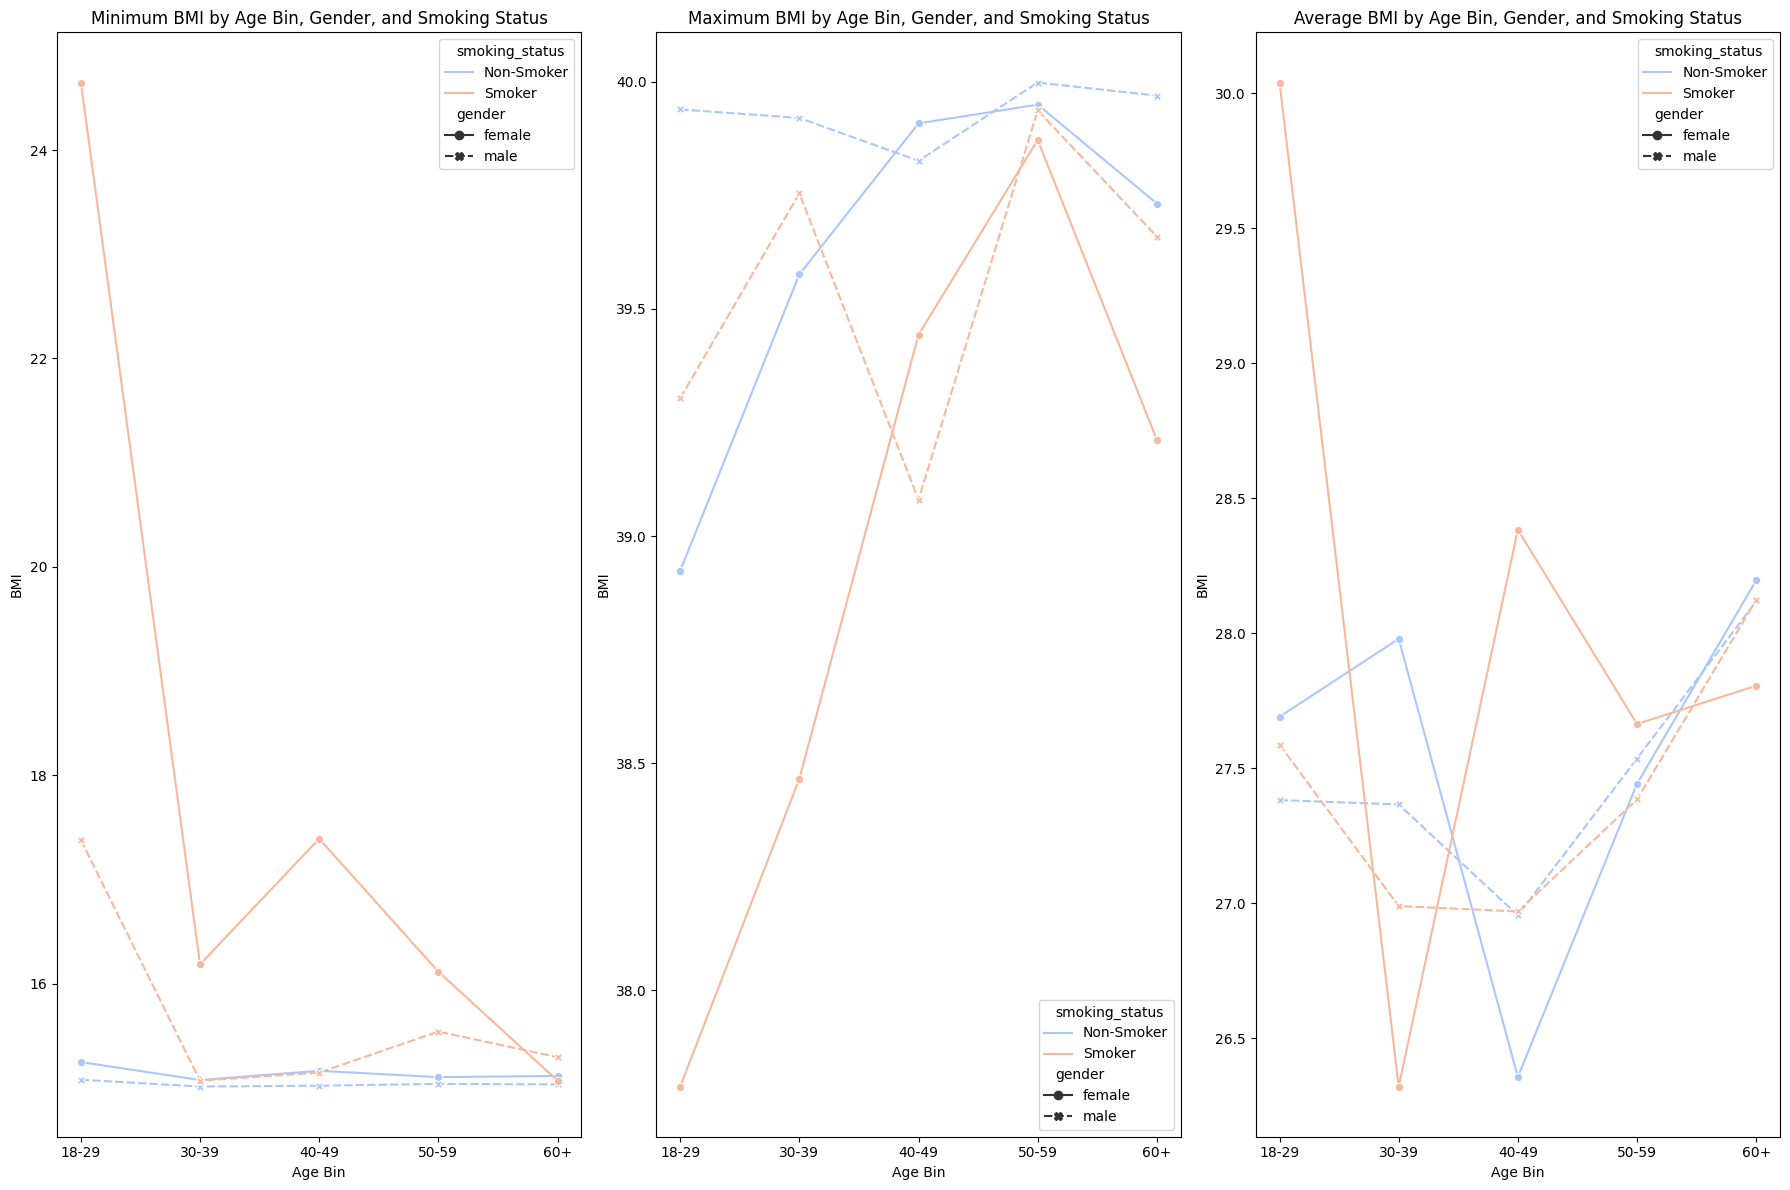

In [44]:
bmi_stats_by_age_bin_and_smokers_df = bmi_stats_by_age_bin_and_smokers.reset_index()

# Create subplots
plt.figure(figsize=(18, 12))

# Plot Min BMI
plt.subplot(1, 3, 1)
sns.lineplot(data=bmi_stats_by_age_bin_and_smokers_df, x='age_bin', y='min', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Minimum BMI by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

# Plot Max BMI
plt.subplot(1, 3, 2)
sns.lineplot(data=bmi_stats_by_age_bin_and_smokers_df, x='age_bin', y='max', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Maximum BMI by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

# Plot Mean BMI
plt.subplot(1, 3, 3)
sns.lineplot(data=bmi_stats_by_age_bin_and_smokers_df, x='age_bin', y='mean', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Average BMI by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

In [45]:
smoking_gender_distribution_by_age_bin = df.groupby(['age_bin', 'smoking_status', 'gender']).size().unstack(level=['smoking_status', 'gender'], fill_value=0)
print(smoking_gender_distribution_by_age_bin)

smoking_status Non-Smoker       Smoker     
gender             female  male female male
age_bin                                    
0-17                    0     0      0    0
18-29                 125   721      7   76
30-39                 162   790     10   80
40-49                 243  1440     29  167
50-59                 395  2243     44  249
60+                   441  2454     38  286


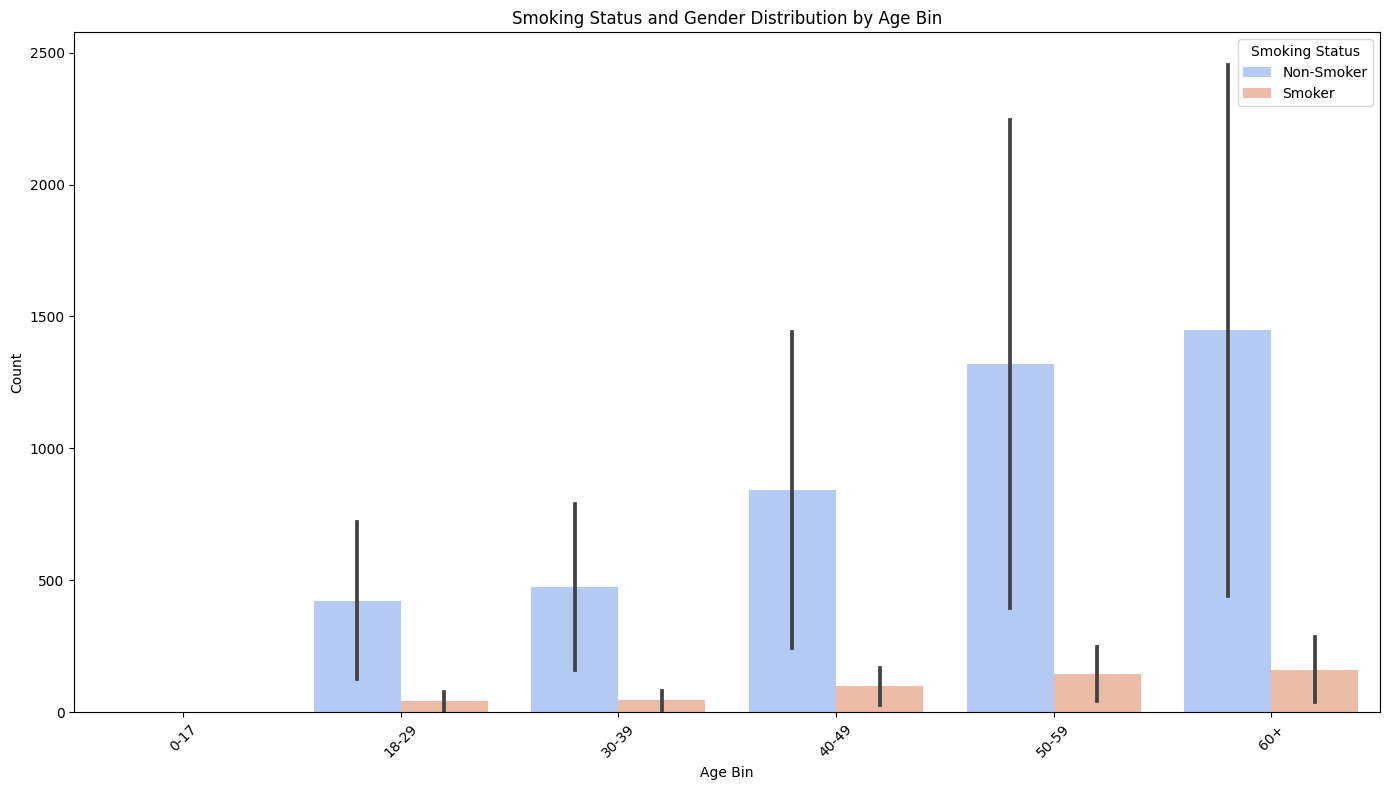

In [46]:
smoking_gender_distribution_df = smoking_gender_distribution_by_age_bin.copy()
smoking_gender_distribution_df.columns = ['_'.join(col).strip() for col in smoking_gender_distribution_df.columns.values]


# Melt the DataFrame
melted_df = smoking_gender_distribution_df.reset_index().melt(id_vars='age_bin', 
                                                             value_vars=[col for col in smoking_gender_distribution_df.columns if col != 'age_bin'],
                                                             var_name='smoking_status_gender', 
                                                             value_name='count')

# Extract smoking status and gender from the combined column
melted_df[['smoking_status', 'gender']] = melted_df['smoking_status_gender'].str.split('_', expand=True)

# Drop the combined column
melted_df.drop(columns=['smoking_status_gender'], inplace=True)


# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='age_bin', y='count', hue='smoking_status', palette='coolwarm', hue_order=['Non-Smoker', 'Smoker'])
plt.title('Smoking Status and Gender Distribution by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Blood Pressure with Gender Distribution 

In [47]:
blood_pressure_stats_by_age_bin_gender = df.groupby(['age_bin', 'gender'])['blood_pressure'].agg(['min', 'max', 'mean'])
print(blood_pressure_stats_by_age_bin_gender)

                      min         max        mean
age_bin gender                                   
0-17    female        NaN         NaN         NaN
        male          NaN         NaN         NaN
18-29   female  90.802919  179.526139  136.527569
        male    90.457558  179.963748  136.195691
30-39   female  91.763092  178.932907  132.218999
        male    90.260825  178.953028  131.621887
40-49   female  90.758257  179.419416  135.737996
        male    90.024794  179.931090  135.379347
50-59   female  90.599895  179.943418  135.165245
        male    90.009620  179.918699  135.899557
60+     female  90.610812  179.523358  136.961581
        male    90.069975  179.999359  135.672293


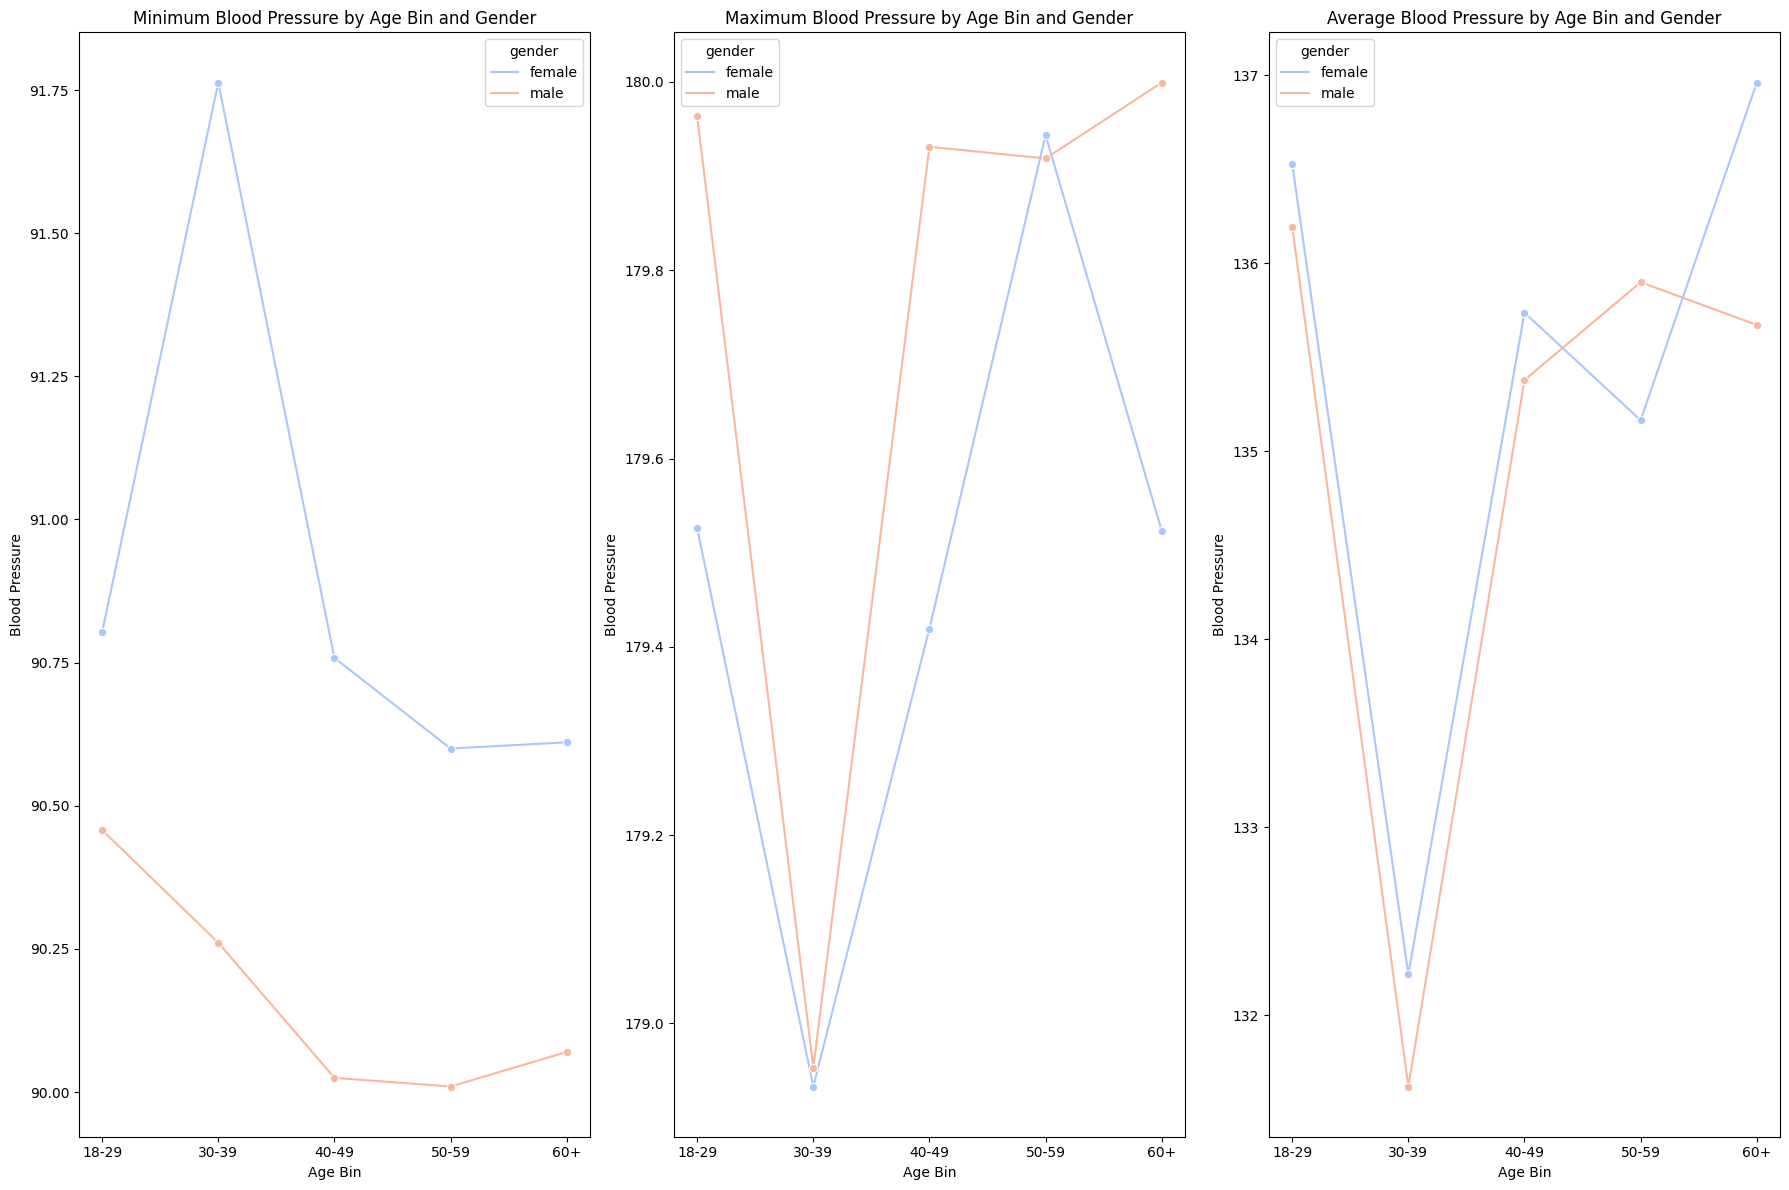

In [48]:
blood_pressure_stats_df = blood_pressure_stats_by_age_bin_gender.reset_index()

# Create subplots
plt.figure(figsize=(18, 12))

# Plot Min Blood Pressure
plt.subplot(1, 3, 1)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='min', hue='gender', marker='o', palette='coolwarm')
plt.title('Minimum Blood Pressure by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

# Plot Max Blood Pressure
plt.subplot(1, 3, 2)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='max', hue='gender', marker='o', palette='coolwarm')
plt.title('Maximum Blood Pressure by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

# Plot Mean Blood Pressure
plt.subplot(1, 3, 3)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='mean', hue='gender', marker='o', palette='coolwarm')
plt.title('Average Blood Pressure by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

plt.tight_layout()
plt.show()

### Blood Pressure with Gender and Smokers Distribution 

In [49]:
blood_pressure_stats_by_age_bin = df.groupby(['age_bin','gender','smoking_status'])['blood_pressure'].agg(['min', 'max', 'mean'])
print(blood_pressure_stats_by_age_bin)

                                      min         max        mean
age_bin gender smoking_status                                    
0-17    female Non-Smoker             NaN         NaN         NaN
               Smoker                 NaN         NaN         NaN
        male   Non-Smoker             NaN         NaN         NaN
               Smoker                 NaN         NaN         NaN
18-29   female Non-Smoker       90.802919  179.526139  136.572075
               Smoker          116.382905  158.980563  135.732825
        male   Non-Smoker       90.457558  179.963748  135.892361
               Smoker           92.399591  175.443195  139.073340
30-39   female Non-Smoker       91.763092  178.932907  132.338205
               Smoker           99.610458  151.576273  130.287862
        male   Non-Smoker       90.260825  178.911754  131.431109
               Smoker           94.932444  178.953028  133.505824
40-49   female Non-Smoker       90.758257  179.419416  135.948849
          

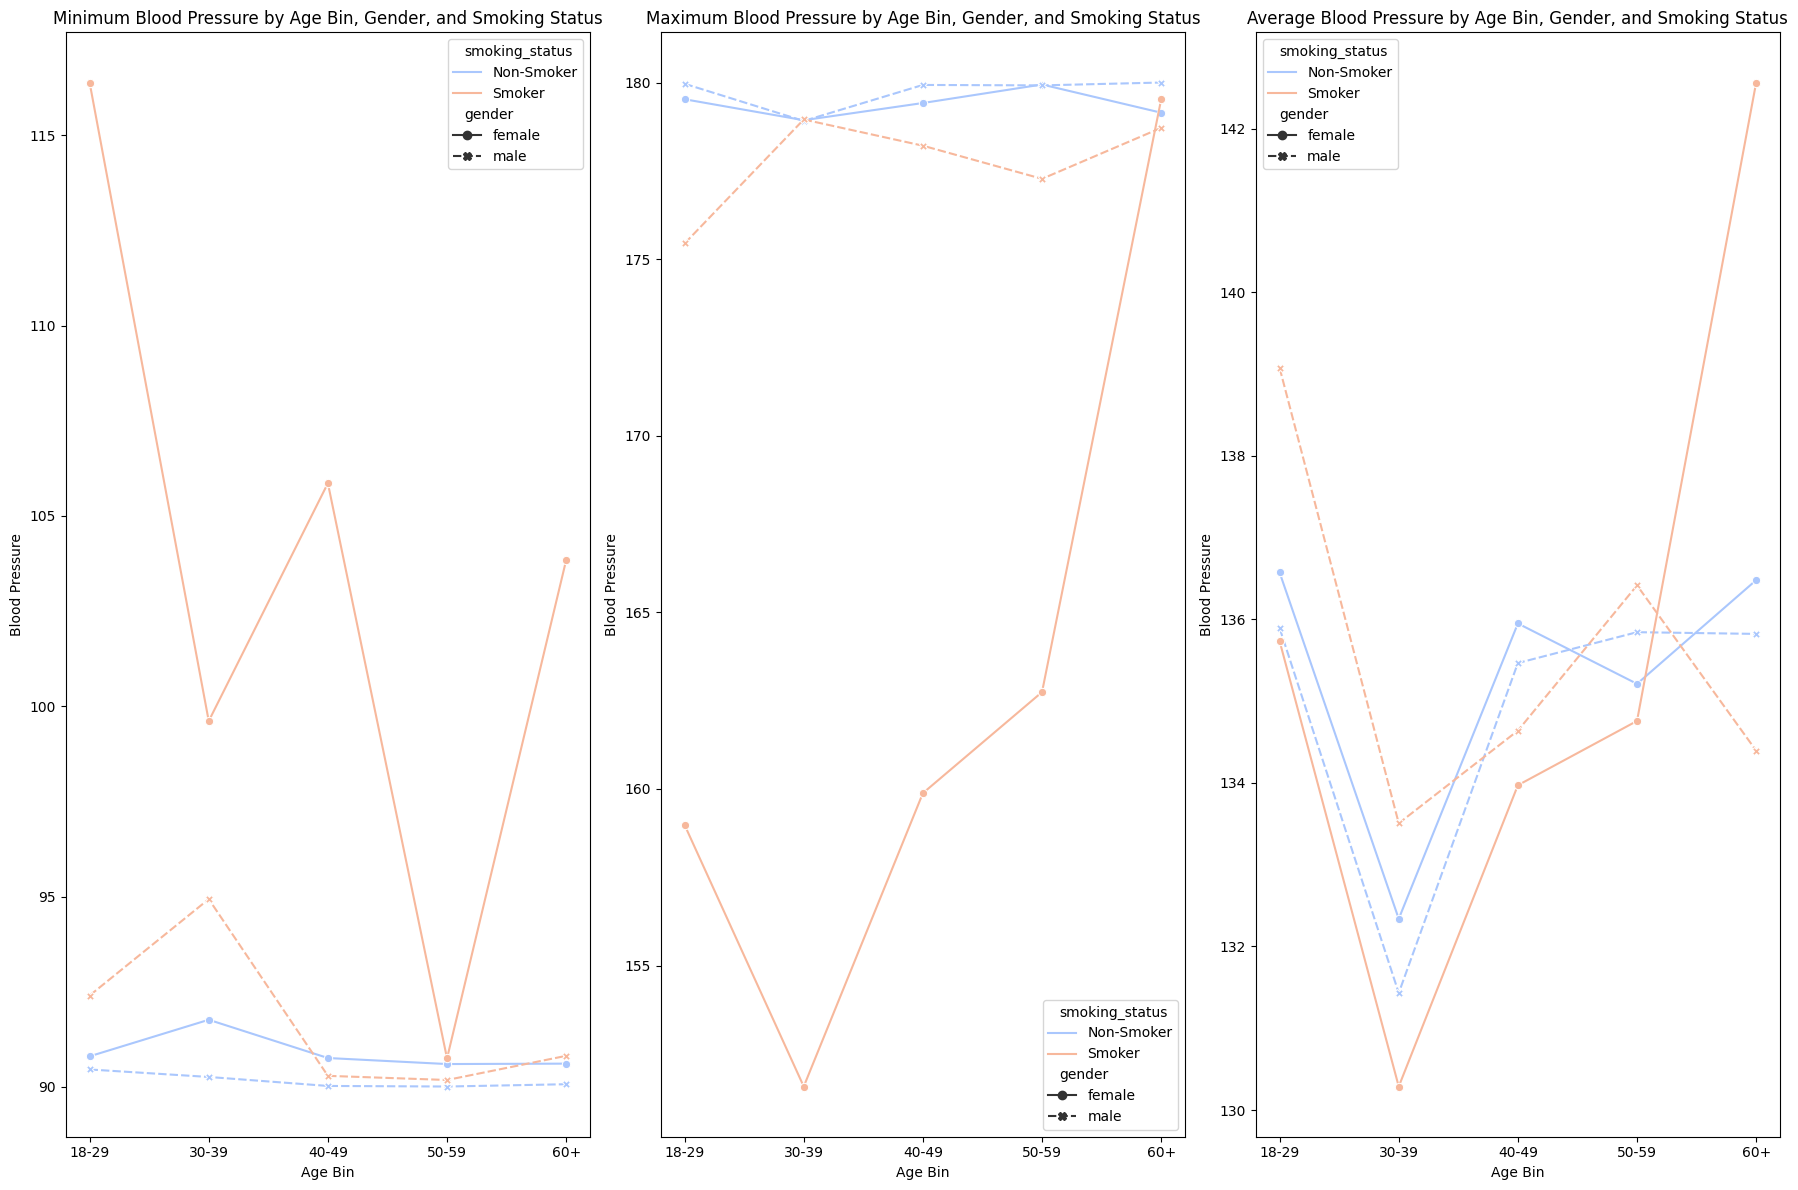

In [50]:
blood_pressure_stats_df = blood_pressure_stats_by_age_bin.reset_index()

# Create subplots
plt.figure(figsize=(18, 12))

# Plot Min Blood Pressure
plt.subplot(1, 3, 1)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='min', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Minimum Blood Pressure by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

# Plot Max Blood Pressure
plt.subplot(1, 3, 2)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='max', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Maximum Blood Pressure by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

# Plot Mean Blood Pressure
plt.subplot(1, 3, 3)
sns.lineplot(data=blood_pressure_stats_df, x='age_bin', y='mean', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Average Blood Pressure by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Blood Pressure')

plt.tight_layout()
plt.show()

### Glucose Level with Gender Distribution 

In [51]:
glucose_levels_stats_by_age_bin_gender = df.groupby(['age_bin', 'gender'])['glucose_levels'].agg(['min', 'max', 'mean'])
print(glucose_levels_stats_by_age_bin_gender)

                      min         max        mean
age_bin gender                                   
0-17    female        NaN         NaN         NaN
        male          NaN         NaN         NaN
18-29   female  72.315868  199.553202  134.123992
        male    70.092712  198.664932  134.092664
30-39   female  70.972393  199.055468  137.987745
        male    70.247694  199.222326  136.227040
40-49   female  70.123626  197.068787  132.353524
        male    70.023115  199.781519  135.472000
50-59   female  71.285937  199.336357  135.192175
        male    70.015961  199.890429  136.479502
60+     female  70.083133  198.834663  135.218224
        male    70.553286  199.861741  135.602775


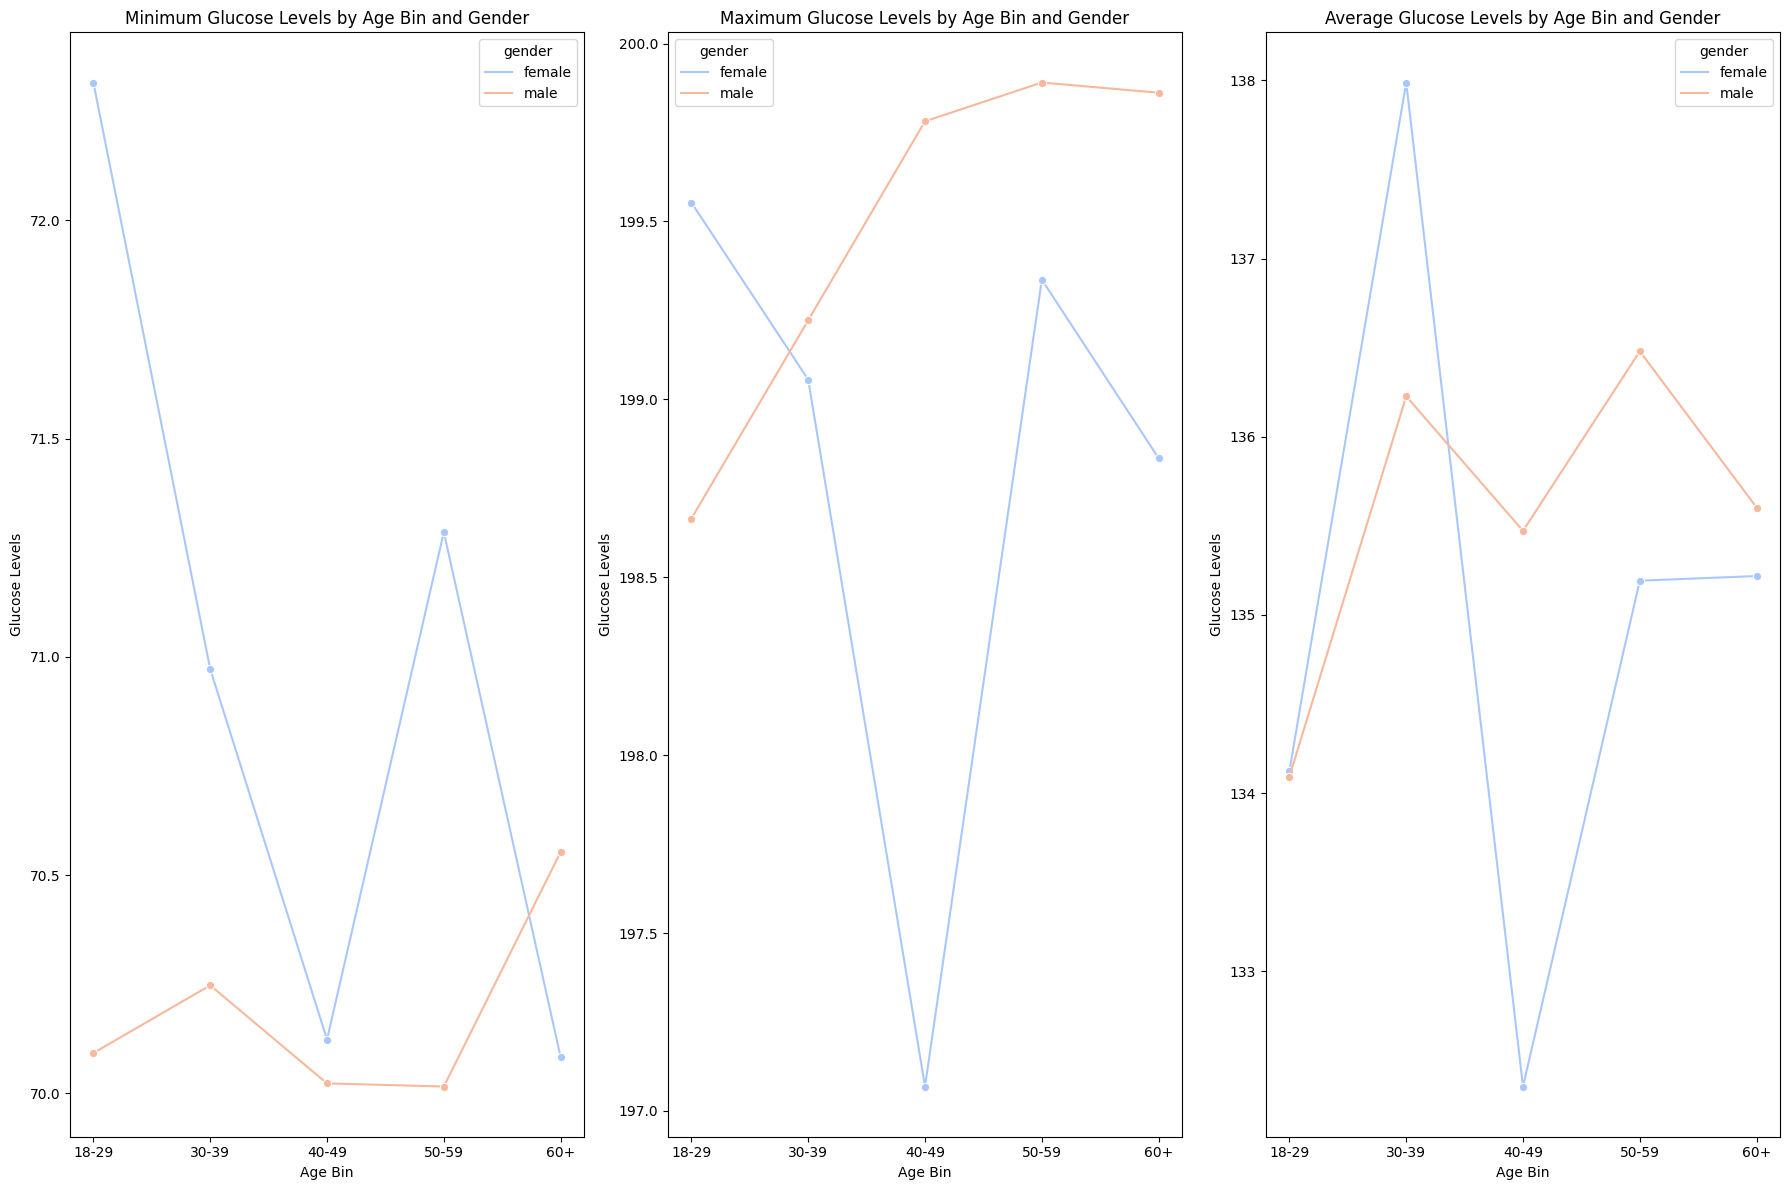

In [52]:
glucose_levels_stats_df = glucose_levels_stats_by_age_bin_gender.reset_index()

# Create subplots
plt.figure(figsize=(18, 12))

# Plot Min Glucose Levels
plt.subplot(1, 3, 1)
sns.lineplot(data=glucose_levels_stats_df, x='age_bin', y='min', hue='gender', marker='o', palette='coolwarm')
plt.title('Minimum Glucose Levels by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

# Plot Max Glucose Levels
plt.subplot(1, 3, 2)
sns.lineplot(data=glucose_levels_stats_df, x='age_bin', y='max', hue='gender', marker='o', palette='coolwarm')
plt.title('Maximum Glucose Levels by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

# Plot Mean Glucose Levels
plt.subplot(1, 3, 3)
sns.lineplot(data=glucose_levels_stats_df, x='age_bin', y='mean', hue='gender', marker='o', palette='coolwarm')
plt.title('Average Glucose Levels by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

plt.tight_layout()
plt.show()

### Glucose Level with Gender and Smokers Distribution 

In [53]:
glucose_levels_stats_by_age_bin_gender_smoker = df.groupby(['age_bin', 'gender','smoking_status'])['glucose_levels'].agg(['min', 'max', 'mean'])
print(glucose_levels_stats_by_age_bin_gender_smoker)

                                      min         max        mean
age_bin gender smoking_status                                    
0-17    female Non-Smoker             NaN         NaN         NaN
               Smoker                 NaN         NaN         NaN
        male   Non-Smoker             NaN         NaN         NaN
               Smoker                 NaN         NaN         NaN
18-29   female Non-Smoker       72.315868  199.553202  133.053828
               Smoker          123.831097  196.359865  153.234065
        male   Non-Smoker       70.092712  198.664932  133.997408
               Smoker           73.802787  196.209979  134.996346
30-39   female Non-Smoker       70.972393  199.055468  137.246181
               Smoker           94.005991  191.784745  150.001072
        male   Non-Smoker       70.247694  199.222326  135.919896
               Smoker           76.428699  198.690671  139.260086
40-49   female Non-Smoker       70.123626  197.068787  133.304473
          

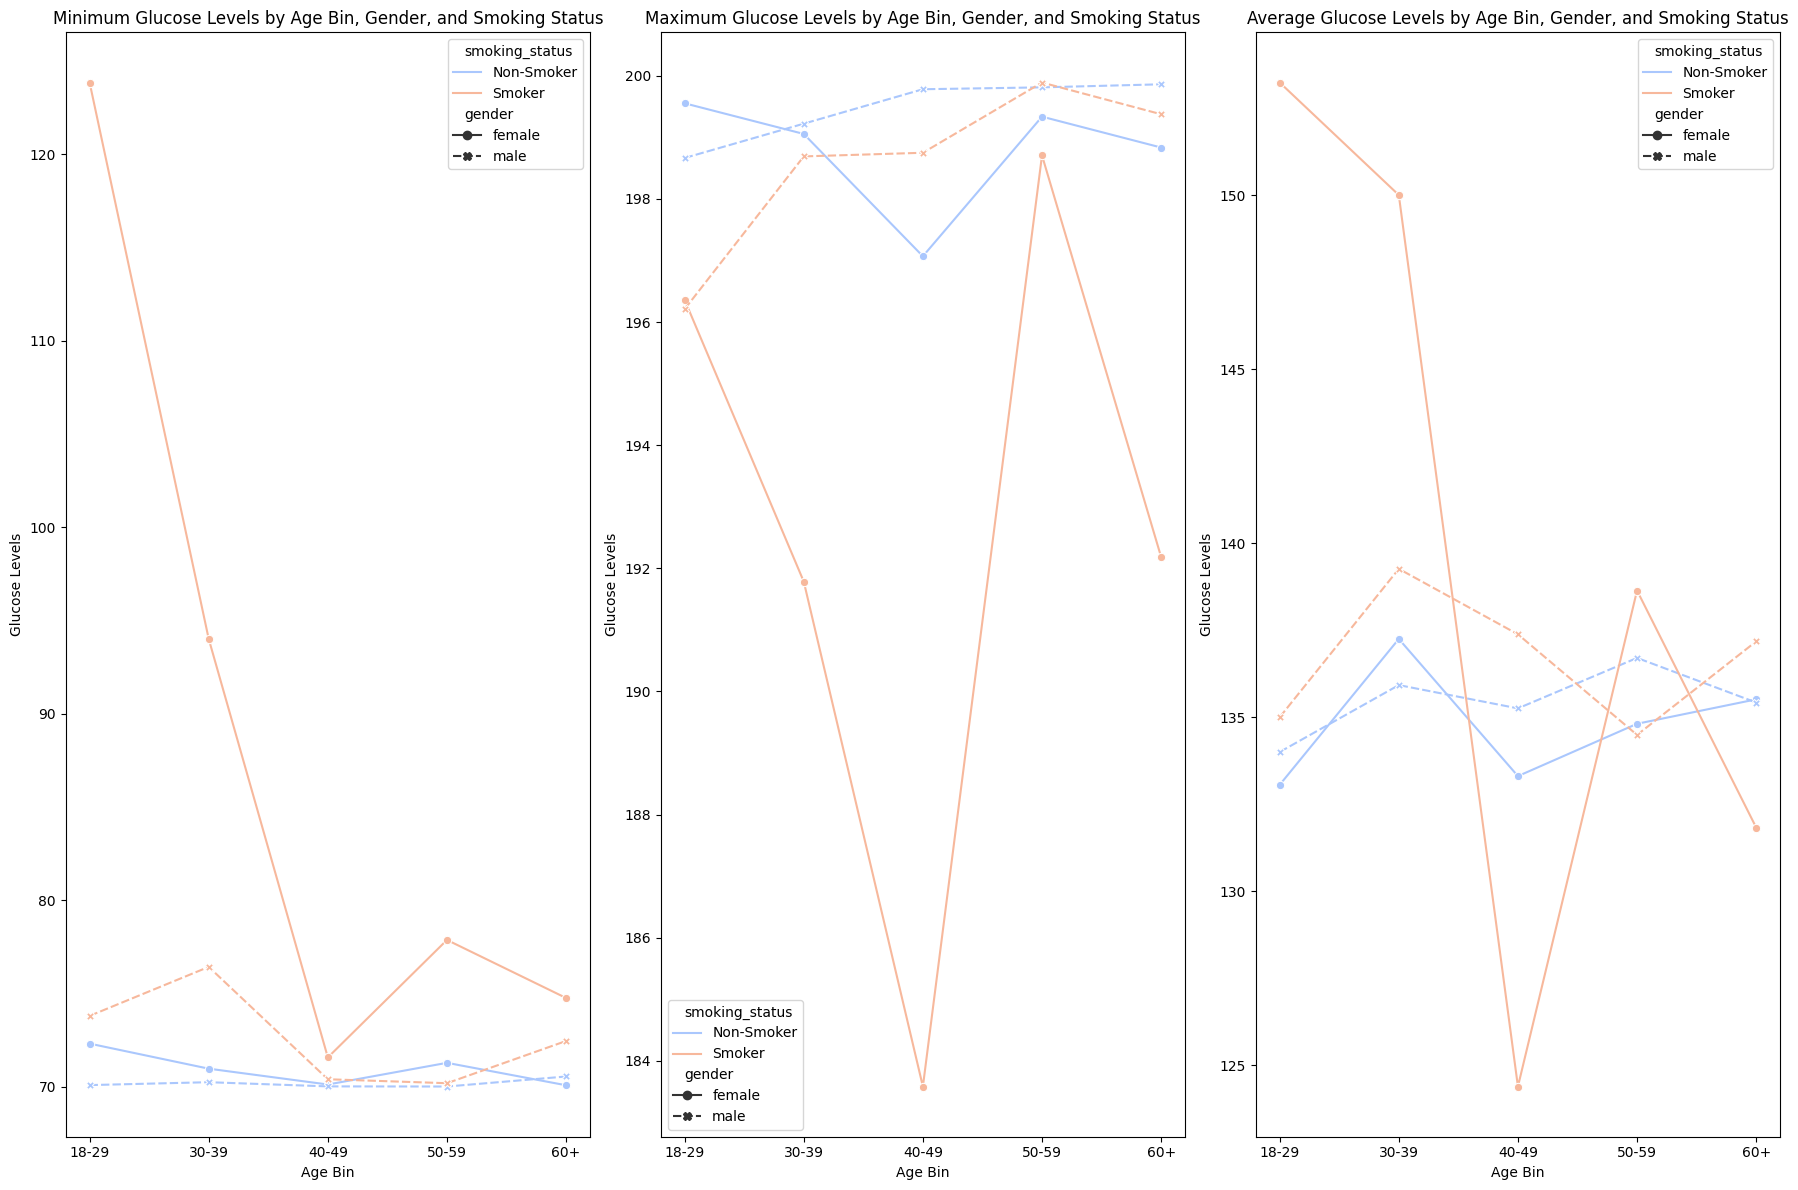

In [54]:
glucose_levels_stats_by_age_bin_gender_smoker_df = glucose_levels_stats_by_age_bin_gender_smoker.reset_index()

# Create subplots
plt.figure(figsize=(18, 12))

# Plot Min Glucose Levels
plt.subplot(1, 3, 1)
sns.lineplot(data=glucose_levels_stats_by_age_bin_gender_smoker_df, x='age_bin', y='min', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Minimum Glucose Levels by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

# Plot Max Glucose Levels
plt.subplot(1, 3, 2)
sns.lineplot(data=glucose_levels_stats_by_age_bin_gender_smoker_df, x='age_bin', y='max', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Maximum Glucose Levels by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

# Plot Mean Glucose Levels
plt.subplot(1, 3, 3)
sns.lineplot(data=glucose_levels_stats_by_age_bin_gender_smoker_df, x='age_bin', y='mean', hue='smoking_status', style='gender', markers=True, palette='coolwarm')
plt.title('Average Glucose Levels by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin')
plt.ylabel('Glucose Levels')

plt.tight_layout()
plt.show()

### Conditions with Gender Distribution 

In [55]:
condition_distribution_by_age_bin_gender = df.groupby(['age_bin', 'gender'])['condition'].value_counts().unstack(fill_value=0)
print(condition_distribution_by_age_bin_gender)

condition       Cancer  Diabetic  Pneumonia
age_bin gender                             
0-17    female       0         0          0
        male         0         0          0
18-29   female      19        80         33
        male       138       472        187
30-39   female      23       101         48
        male       139       523        208
40-49   female      42       159         71
        male       250       949        408
50-59   female      58       269        112
        male       353      1481        658
60+     female      68       284        127
        male       370      1695        675


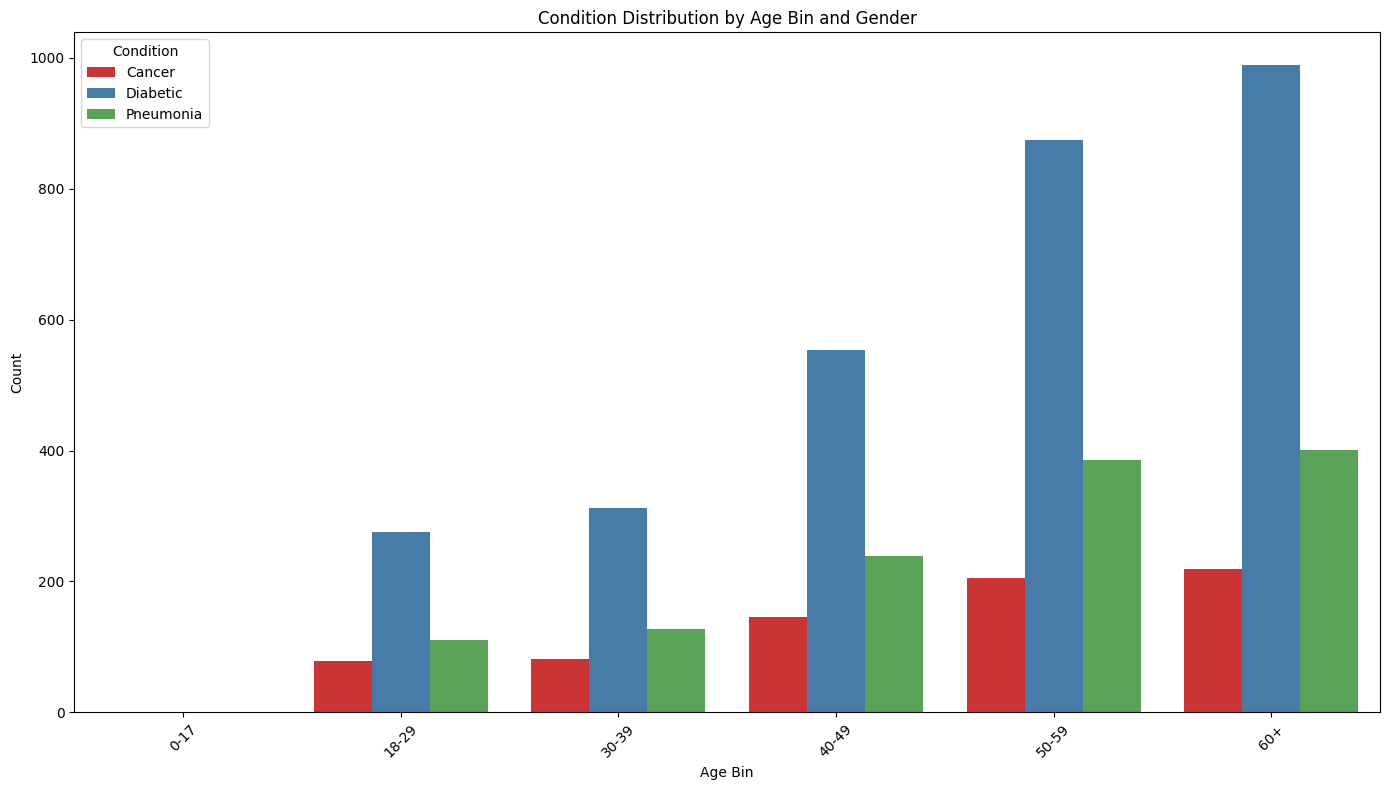

In [56]:
condition_distribution_df = condition_distribution_by_age_bin_gender.reset_index()
condition_distribution_melted = condition_distribution_df.melt(id_vars=['age_bin', 'gender'],
                                                               value_vars=['Cancer', 'Diabetic', 'Pneumonia'],
                                                               var_name='condition', value_name='count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=condition_distribution_melted, x='age_bin', y='count', hue='condition', palette='Set1', errorbar=None)
plt.title('Condition Distribution by Age Bin and Gender')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conditions with Gender and Smokers Distribution 

In [57]:
condition_distribution_by_age_bin_gender_smoker = df.groupby(['age_bin', 'gender','smoking_status'])['condition'].value_counts().unstack(fill_value=0)
print(condition_distribution_by_age_bin_gender_smoker)

condition                      Cancer  Diabetic  Pneumonia
age_bin gender smoking_status                             
0-17    female Non-Smoker           0         0          0
               Smoker               0         0          0
        male   Non-Smoker           0         0          0
               Smoker               0         0          0
18-29   female Non-Smoker          18        77         30
               Smoker               1         3          3
        male   Non-Smoker         122       427        172
               Smoker              16        45         15
30-39   female Non-Smoker          23        92         47
               Smoker               0         9          1
        male   Non-Smoker         122       477        191
               Smoker              17        46         17
40-49   female Non-Smoker          36       142         65
               Smoker               6        17          6
        male   Non-Smoker         226       845        3

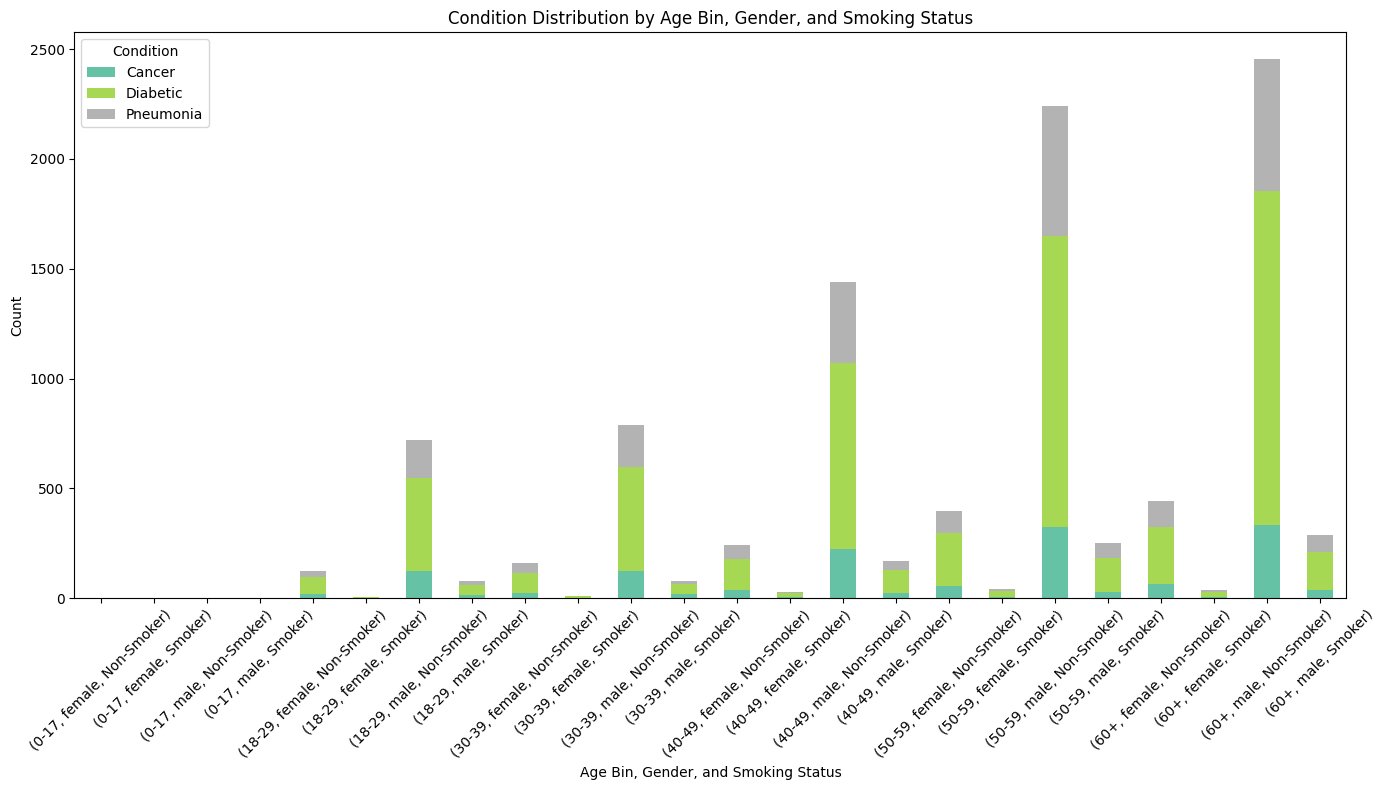

In [58]:
condition_distribution_by_age_bin_gender_smoker.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

plt.title('Condition Distribution by Age Bin, Gender, and Smoking Status')
plt.xlabel('Age Bin, Gender, and Smoking Status')
plt.ylabel('Count')
plt.legend(title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ThankYou